In [6]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


**Upload and Clean Dataset**



In [34]:
# read the military dataset and get the overview 
df = pd.read_excel('C:/Users/antar/Downloads/SIPRI-Milex-data-1949-2022.xlsx', sheet_name='Share of GDP', skiprows=5)
print(df.head(8))


C:\Users\antar\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


              Country  Notes 1949 1950 1951 1952 1953 1954 1955      1956  \
0                 NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
1              Africa    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
2        North Africa    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   
3             Algeria     §4  xxx  xxx  xxx  xxx  xxx  xxx  xxx       xxx   
4               Libya  ‡§¶16  xxx  xxx  ...  ...  ...  ...  ...       ...   
5             Morocco    §17  xxx  xxx  xxx  xxx  xxx  xxx  xxx  0.011807   
6             Tunisia    NaN  xxx  xxx  xxx  xxx  xxx  xxx  xxx       ...   
7  sub-Saharan Africa    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN   

   ...      2013      2014      2015      2016      2017      2018      2019  \
0  ...       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1  ...       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  ...       NaN       NaN       NaN       NaN       NaN       NaN

In [35]:
df_capita = pd.read_excel('C:/Users/antar/Downloads/SIPRI-Milex-data-1949-2022.xlsx', sheet_name='Per capita', skiprows=6)
print(df_capita.head(8))

C:\Users\antar\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


              Country  Notes        1988        1989        1990       1991  \
0              Africa    NaN         NaN         NaN         NaN        NaN   
1        North Africa    NaN         NaN         NaN         NaN        NaN   
2             Algeria     §4   42.082045    34.02776   35.104979   21.40523   
3               Libya  ‡§¶16         ...         ...         ...        ...   
4             Morocco    §17    38.37304   40.669859   43.121719  45.464992   
5             Tunisia    NaN   29.558419   29.039954    30.06865  30.900692   
6  sub-Saharan Africa    NaN         NaN         NaN         NaN        NaN   
7              Angola    §‖1  132.759575  170.105578  147.801583  84.190366   

        1992        1993       1994       1995  ...        2013        2014  \
0        NaN         NaN        NaN        NaN  ...         NaN         NaN   
1        NaN         NaN        NaN        NaN  ...         NaN         NaN   
2  38.970758   46.204627  47.313803  42.932582  ...

In [36]:
# Remove regions and drop these unnecessary rows 
list_regions = ['Africa', 'North Africa', 'sub-Saharan Africa', 'Americas', 'Central America and the Caribbean', 'North America', 'South America', 'Asia & Oceania', 'Oceania', 'South Asia', 'East Asia', 'South East Asia', 'Central Asia', 'Europe', 'Central Europe', 'Eastern Europe', 'Western Europe', 'Middle East']
df = df[~df['Country'].isin(list_regions)]
df = df.drop([df.index[0]])
df = df.drop("Notes", axis=1)
df.head(8)

,Country,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Algeria,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.048445,0.055485,0.062702,0.063849,0.059244,0.054836,0.059997,0.066925,0.055854,0.047794
4,Libya,xxx,xxx,...,...,...,...,...,...,...,...,0.076393,0.154796,...,...,...,...,...,...,...,...
5,Morocco,xxx,xxx,xxx,xxx,xxx,xxx,xxx,0.011807,0.01759,...,0.038058,0.036779,0.032302,0.032206,0.031838,0.031301,0.030821,0.042097,0.039428,0.039049
6,Tunisia,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,...,...,0.015597,0.018069,0.021396,0.02225,0.020318,0.019764,0.023833,0.027098,0.026367,0.024768
8,Angola,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.044552,0.046985,0.031054,0.027333,0.02508,0.019558,0.017391,0.017002,0.012899,0.013287
9,Benin,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.006872,0.007009,0.007985,0.006736,0.009206,0.006329,0.004733,0.004588,0.005509,0.005575
10,Botswana,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.021472,0.02212,0.028252,0.034107,0.032486,0.029248,0.030812,0.033348,0.030456,0.02744
11,Burkina Faso,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.012361,0.012723,0.012508,0.011653,0.013636,0.01905,0.022385,0.022013,0.024019,0.030948


In [37]:
#reshape df so it will match happiness and military dataframe

df_military = df.melt(id_vars="Country", value_name="Spend in % of GDP", var_name="year")
df_military.head()

,Country,year,Spend in % of GDP
0,Algeria,1949,xxx
1,Libya,1949,xxx
2,Morocco,1949,xxx
3,Tunisia,1949,xxx
4,Angola,1949,xxx


In [38]:
df_capita = df_capita[~df_capita['Country'].isin(list_regions)]
df_capita = df_capita.drop([df_capita.index[0]])
df_capita = df_capita.drop("Notes", axis=1)
df_capita.head(8)

,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3,Libya,...,...,...,...,...,...,...,...,...,...,627.324391,590.325762,...,...,...,...,...,...,...,...
4,Morocco,38.37304,40.669859,43.121719,45.464992,47.782138,47.860315,51.35608,53.267345,52.847704,...,120.582285,118.408181,94.286966,94.717073,97.283987,102.607814,102.032349,130.881211,144.018384,132.238056
5,Tunisia,29.558419,29.039954,30.06865,30.900692,33.628641,31.3969,33.12543,37.578352,42.89085,...,69.328849,82.107924,87.594529,87.37922,75.128976,72.998475,85.585475,97.924729,104.763269,95.973015
7,Angola,132.759575,170.105578,147.801583,84.190366,62.743053,135.709207,44.060366,16.769001,11.09242,...,234.11561,254.110657,129.403928,95.834371,102.72237,64.38214,46.219598,30.23168,28.92235,46.328939
8,Benin,7.903186,5.918243,6.592465,...,...,...,...,...,...,...,8.596018,9.039633,8.594562,7.319865,10.39309,7.854804,5.771747,5.924096,7.824632,7.601333
9,Botswana,78.122579,82.635382,121.407024,129.916431,130.488303,132.717286,118.851996,112.916254,93.395438,...,148.540268,165.764156,180.924035,238.177523,236.929912,220.97934,223.403182,212.171547,223.875845,200.46053
10,Burkina Faso,6.843811,7.787472,9.58637,7.68017,7.649416,6.336576,3.082316,3.653401,3.58063,...,9.73094,10.074319,8.168226,8.016055,9.954975,15.481802,17.613383,18.297119,21.318282,25.452805
11,Burundi,6.627103,7.14213,7.281182,7.682257,6.856573,6.255157,7.104551,7.033394,8.398347,...,6.379403,6.316277,6.512262,6.337037,5.902713,5.855624,7.344499,5.674383,5.579469,8.034394


In [45]:
df_militarycapita = df.melt(id_vars="Country", value_name="Per capita", var_name="year")
df_militarycapita.head()

,Country,year,Per capita
0,Algeria,1949,xxx
1,Libya,1949,xxx
2,Morocco,1949,xxx
3,Tunisia,1949,xxx
4,Angola,1949,xxx


In [46]:
#upload happiness data
happinessdataframe = pd.read_excel('C:/Users/antar/Downloads/DataForTable2.1WHR2023.xls', index_col=[0,1]) 

In [47]:
#upload UN General Debate Corpus and Speeches

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "C:/Users/antar/Downloads/UN General Debate Corpus/TXT/Session "+str(session)+" - "+str(1945+session)
    # directory = f"./TXT/Session {session} - {1945+session}"
    for filename in os.listdir(directory):
        # f = open(os.path.join(directory, filename))
        with open(os.path.join(directory, filename),encoding="utf8") as f:
            if filename[0]==".": #ignore hidden files
                continue
            splt = filename.split("_")
            data.append([session, 1945+session, splt[0], f.read()])

df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [48]:
#Upload UNSD country codes
df_codes = pd.read_csv('C:/Users/antar/Downloads/UNSD — Methodology.csv', sep=";")
df_codes.tail()

# Some countries have commas in the name

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
243,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Wallis and Futuna Islands,876,WF,WLF,NaN,NaN,NaN


In [49]:
# Merge UN Speeches and Country C
df_un_merged =  pd.merge(df_codes, df_speech, how="right", on="ISO-alpha3 Code")[["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Least Developed Countries (LDC)", "Session", "Year", "Speech"]]
df_un_merged = df_un_merged.set_index(['Year', 'ISO-alpha3 Code'])
df_un_merged

Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   
...                              ...         ...   
2020 WSM                       Samoa     Oceania   
     YEM                       Yemen        Asia   
     ZAF                South Africa      Africa   
     ZMB                      Zambia      Africa   
     ZWE                    Zimbabwe      Africa   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   
...                                               ...   
2020 WSM                                    Polynesia   
     YEM                                 Western Asia   
     ZAF                           Sub-Saharan Africa   
     ZMB                           Sub-Saharan Africa   
     ZWE                           Sub-Saharan Africa   

                     Least Developed Countries (LDC)  Session  \
Year ISO-alpha3 Code                                            
1970 ALB                                         NaN       25   
     ARG                                         NaN       25   
     AUS                                         NaN       25   
     AUT                                         NaN       25   
     BEL                                         NaN       25   
...                                              ...      ...   
2020 WSM                                         NaN       75   
     YEM                                           x       75   
     ZAF                                         NaN       75   
     ZMB                                           x       75   
     ZWE                                         NaN       75   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...  
...                                                                 ...  
2020 WSM              Mr. President,\nDistinguished delegates,\nLadi...  
     YEM              In the name of God the Merciful and the Compas...  
     ZAF              President of the General Assembly, Secretary-G...  
     ZMB              Your excellency Mr. Volkan Bozkir, President o...  
     ZWE              Your Excellency, Ambassador Volkan Bozkir, Pre...  

[8481 rows x 6 columns]

In [50]:
# Add a new column "Peace_Count" with the counts of "peace" in each speech
df_un_merged["Peace_Count"] = df_un_merged["Speech"].str.count("peace")
df_un_merged= df_un_merged.reset_index()
df_un_merged
# add frequency of word 'security' as column

df_un_merged["Security"] = df_un_merged["Speech"].str.count("security")
df_un_merged

,Year,ISO-alpha3 Code,Country or Area,Region Name,Sub-region Name,Least Developed Countries (LDC),Session,Speech,Peace_Count,Security
0,1970,ALB,Albania,Europe,Southern Europe,NaN,25,33: May I first convey to our President the co...,39,24
1,1970,ARG,Argentina,Americas,Latin America and the Caribbean,NaN,25,177.\t : It is a fortunate coincidence that pr...,17,9
2,1970,AUS,Australia,Oceania,Australia and New Zealand,NaN,25,100.\t It is a pleasure for me to extend to y...,24,6
3,1970,AUT,Austria,Europe,Western Europe,NaN,25,155.\t May I begin by expressing to Ambassado...,24,8
4,1970,BEL,Belgium,Europe,Western Europe,NaN,25,"176. No doubt each of us, before coming up to ...",7,15
...,...,...,...,...,...,...,...,...,...,...
8476,2020,WSM,Samoa,Oceania,Polynesia,NaN,75,"Mr. President,\nDistinguished delegates,\nLadi...",6,5
8477,2020,YEM,Yemen,Asia,Western Asia,x,75,In the name of God the Merciful and the Compas...,7,1
8478,2020,ZAF,South Africa,Africa,Sub-Saharan Africa,NaN,75,"President of the General Assembly, Secretary-G...",7,3
8479,2020,ZMB,Zambia,Africa,Sub-Saharan Africa,x,75,"Your excellency Mr. Volkan Bozkir, President o...",5,0


In [51]:
#filter out columns 

df_assignment = df_un_merged[['Year','ISO-alpha3 Code','Country or Area','Security','Peace_Count']]
df_assignment

,Year,ISO-alpha3 Code,Country or Area,Security,Peace_Count
0,1970,ALB,Albania,24,39
1,1970,ARG,Argentina,9,17
2,1970,AUS,Australia,6,24
3,1970,AUT,Austria,8,24
4,1970,BEL,Belgium,15,7
...,...,...,...,...,...
8476,2020,WSM,Samoa,5,6
8477,2020,YEM,Yemen,1,7
8478,2020,ZAF,South Africa,3,7
8479,2020,ZMB,Zambia,0,5


In [52]:
#add Spend in % of GDP spend to dataframe

df_militaryUN = pd.merge(df_assignment, df_military, left_on=["Country or Area", "Year"], right_on=["Country", "year"]).drop(['Country','year'], axis=1)
df_militaryUN

,Year,ISO-alpha3 Code,Country or Area,Security,Peace_Count,Spend in % of GDP
0,1970,ALB,Albania,24,39,...
1,1970,ARG,Argentina,9,17,0.018778
2,1970,AUS,Australia,6,24,0.02966
3,1970,AUT,Austria,8,24,0.013801
4,1970,BEL,Belgium,15,7,0.029186
...,...,...,...,...,...,...
6573,2020,VNM,Viet Nam,2,8,...
6574,2020,YEM,Yemen,1,7,...
6575,2020,ZAF,South Africa,3,7,0.009575
6576,2020,ZMB,Zambia,0,5,0.011675


In [53]:
df_militaryUNCapita = pd.merge(df_assignment, df_militarycapita, left_on=["Country or Area", "Year"], right_on=["Country", "year"]).drop(['Country','year'], axis=1)
df_militaryUNCapita

,Year,ISO-alpha3 Code,Country or Area,Security,Peace_Count,Per capita
0,1970,ALB,Albania,24,39,...
1,1970,ARG,Argentina,9,17,0.018778
2,1970,AUS,Australia,6,24,0.02966
3,1970,AUT,Austria,8,24,0.013801
4,1970,BEL,Belgium,15,7,0.029186
...,...,...,...,...,...,...
6573,2020,VNM,Viet Nam,2,8,...
6574,2020,YEM,Yemen,1,7,...
6575,2020,ZAF,South Africa,3,7,0.009575
6576,2020,ZMB,Zambia,0,5,0.011675


In [18]:
#Merge happiness dataframe with Military UN dataframe

df_final = pd.merge(df_militaryUN, happinessdataframe, left_on=['Country or Area', 'Year'], right_on=['Country name', 'year'])
df_final

,Year,ISO-alpha3 Code,Country or Area,Security,Peace_Count,Spend in % of GDP,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005,AUS,Australia,5,1,0.018025,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012
1,2005,BEL,Belgium,6,5,0.010966,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380
2,2005,BRA,Brazil,4,7,0.01524,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780
3,2005,CAN,Canada,3,2,0.011071,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278
4,2005,CZE,Czechia,5,2,0.017788,6.439257,10.321686,0.918759,67.099998,0.865235,NaN,0.900733,0.638764,0.257949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2020,URY,Uruguay,4,9,0.020358,6.309681,9.990978,0.921070,67.500000,0.907762,-0.091452,0.491008,0.720521,0.264692
1636,2020,UZB,Uzbekistan,3,4,...,5.841930,8.901669,0.849565,65.000000,0.928216,0.193077,0.642044,0.677927,0.278509
1637,2020,ZAF,South Africa,3,7,0.009575,4.946801,9.458443,0.891050,56.724998,0.756946,-0.027119,0.912407,0.760584,0.294276
1638,2020,ZMB,Zambia,0,5,0.011675,4.837992,8.065784,0.766872,54.825001,0.750422,0.057657,0.809750,0.679043,0.344526


In [54]:
df_finalcapita = pd.merge(df_militaryUNCapita, happinessdataframe, left_on=['Country or Area', 'Year'], right_on=['Country name', 'year'])
df_finalcapita

,Year,ISO-alpha3 Code,Country or Area,Security,Peace_Count,Per capita,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005,AUS,Australia,5,1,0.018025,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012
1,2005,BEL,Belgium,6,5,0.010966,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380
2,2005,BRA,Brazil,4,7,0.01524,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780
3,2005,CAN,Canada,3,2,0.011071,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278
4,2005,CZE,Czechia,5,2,0.017788,6.439257,10.321686,0.918759,67.099998,0.865235,NaN,0.900733,0.638764,0.257949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2020,URY,Uruguay,4,9,0.020358,6.309681,9.990978,0.921070,67.500000,0.907762,-0.091452,0.491008,0.720521,0.264692
1636,2020,UZB,Uzbekistan,3,4,...,5.841930,8.901669,0.849565,65.000000,0.928216,0.193077,0.642044,0.677927,0.278509
1637,2020,ZAF,South Africa,3,7,0.009575,4.946801,9.458443,0.891050,56.724998,0.756946,-0.027119,0.912407,0.760584,0.294276
1638,2020,ZMB,Zambia,0,5,0.011675,4.837992,8.065784,0.766872,54.825001,0.750422,0.057657,0.809750,0.679043,0.344526


In [248]:
df_final[df_final['ISO-alpha3 Code']=='MEX']

,Year,ISO-alpha3 Code,Country or Area,Security,Peace_Count,Spend in % of GDP,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,2005,MEX,Mexico,2,1,0.00356,6.580658,9.791636,0.902808,64.400002,0.813745,NaN,0.764249,0.763287,0.218943
160,2007,MEX,Mexico,12,3,0.004012,6.525378,9.831493,0.878806,64.680000,0.670430,-0.098590,0.746681,0.753814,0.248498
213,2008,MEX,Mexico,8,5,0.003905,6.829036,9.830189,0.876328,64.820000,0.677477,-0.131715,0.784898,0.774336,0.201175
291,2009,MEX,Mexico,7,2,0.005016,6.962819,9.763516,0.868221,64.959999,0.682463,-0.080141,0.764226,0.763130,0.196071
442,2010,MEX,Mexico,8,14,0.004527,6.802389,9.800165,0.876390,65.099998,0.778121,-0.052732,0.692892,0.745260,0.215495
521,2011,MEX,Mexico,2,5,0.004658,6.909515,9.821863,0.824064,65.239998,0.831368,-0.103744,0.697580,0.700016,0.227556
631,2012,MEX,Mexico,7,7,0.00476,7.320185,9.843673,0.767279,65.379997,0.787768,-0.097219,0.633281,0.721976,0.278111
777,2013,MEX,Mexico,2,4,0.005079,7.442546,9.843951,0.759138,65.519997,0.738717,-0.169078,0.614747,0.749587,0.222949
882,2014,MEX,Mexico,3,8,0.005138,6.679831,9.859636,0.781965,65.660004,0.779133,-0.098690,0.629851,0.759793,0.228730
980,2015,MEX,Mexico,2,10,0.004667,6.236287,9.880367,0.760614,65.800003,0.719466,-0.156223,0.707972,0.706145,0.237188


In [55]:
# Checking missing values of % GDP
missing_values = df_final.isna().sum()
print(missing_values)

Year                                 0
ISO-alpha3 Code                      0
Country or Area                      0
Security                             0
Peace_Count                          0
Spend in % of GDP                    0
Life Ladder                          0
Log GDP per capita                   5
Social support                      10
Healthy life expectancy at birth     0
Freedom to make life choices        24
Generosity                          47
Perceptions of corruption           98
Positive affect                     20
Negative affect                     12
dtype: int64


In [56]:
missing_valuescapita = df_finalcapita.isna().sum()
print(missing_valuescapita)

Year                                 0
ISO-alpha3 Code                      0
Country or Area                      0
Security                             0
Peace_Count                          0
Per capita                           0
Life Ladder                          0
Log GDP per capita                   5
Social support                      10
Healthy life expectancy at birth     0
Freedom to make life choices        24
Generosity                          47
Perceptions of corruption           98
Positive affect                     20
Negative affect                     12
dtype: int64


In [57]:
df_finalcapita = df_finalcapita.replace('...', np.nan)

In [20]:
#numerical features

num_cols = ['Security','Peace_Count', 'Spend in % of GDP', 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']                

In [59]:
num_cols_capita = ['Security','Peace_Count', 'Per capita', 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']       

In [60]:
df_numerical = df_final[num_cols]

In [61]:
df_numerical_capita = df_finalcapita[num_cols_capita]

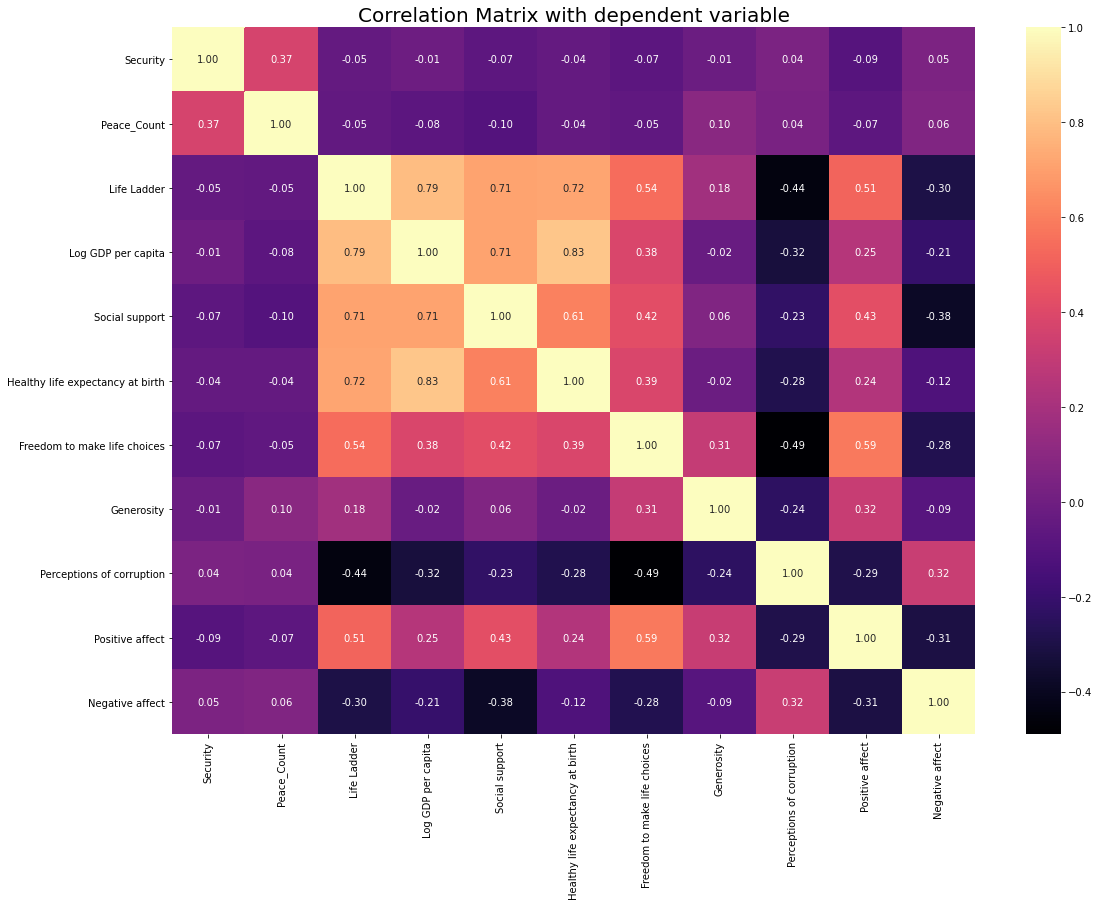

In [22]:
# Correlation Matrix with dependent variable
import seaborn as sns

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_final[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix with dependent variable", fontsize=20)
plt.show()

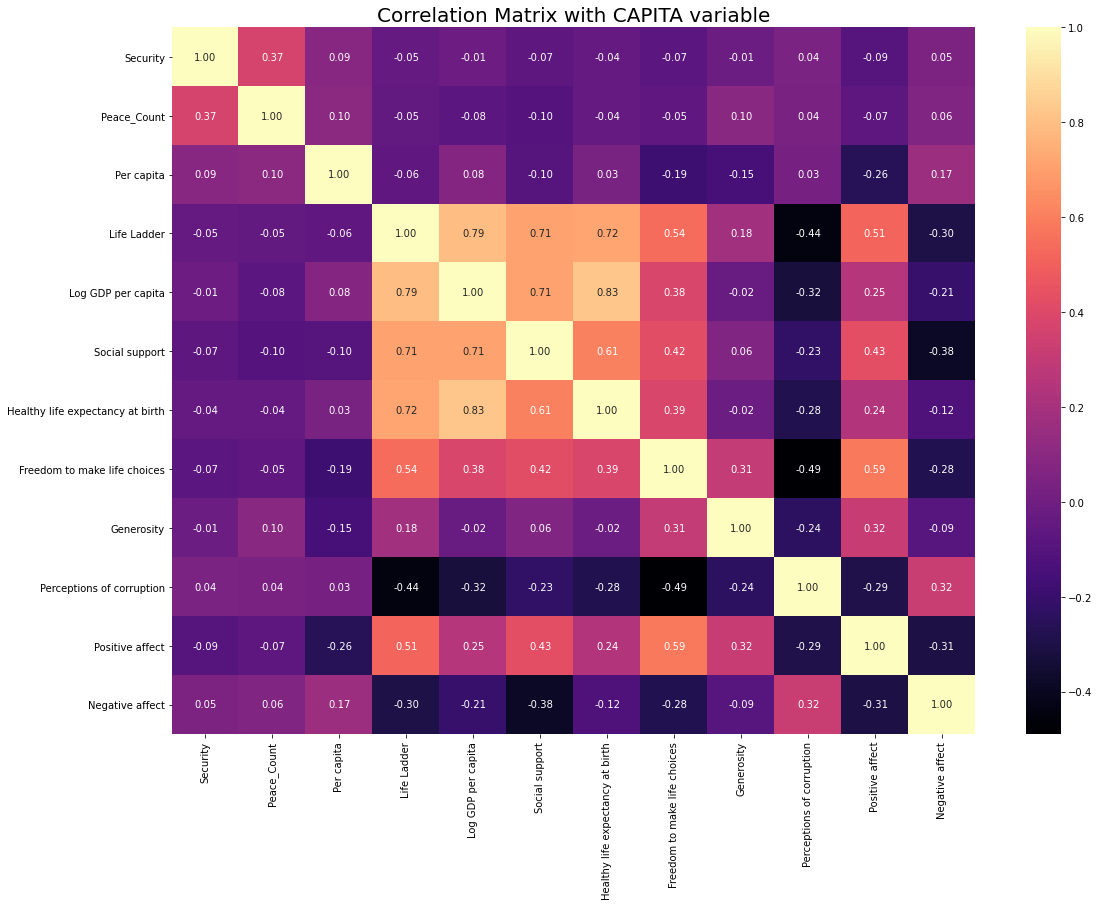

In [64]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df_finalcapita[num_cols_capita].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix with CAPITA variable", fontsize=20)
plt.show()

In [256]:
# Checking missing values
missing_values = df_final.isna().sum()
print(missing_values)

Year                                 0
ISO-alpha3 Code                      0
Country or Area                      0
Security                             0
Peace_Count                          0
Spend in % of GDP                    0
Life Ladder                          0
Log GDP per capita                   5
Social support                       9
Healthy life expectancy at birth     0
Freedom to make life choices        22
Generosity                          45
Perceptions of corruption           96
Positive affect                     19
Negative affect                     11
dtype: int64


In [265]:
# Checking the percentage of  missing values in features
for i in df.columns:
  # Check if there are any missing values in the column
  if (df[i].isnull().sum() > 0):
    # Calculate the percentage of missing values
    misval = (df[i].isnull().sum()) / (len(df[i])) * 100
    # Print the name of the column and the percentage of missing values
    print(f'{i} Perc. Mis Val = {misval:.2f} %')

ValueError: could not convert string to float: '...'

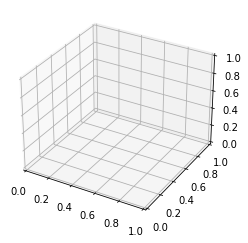

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')
threedee.scatter(df_final['Spend in % of GDP'], df_final['Security'], df_final['Peace_Count'])
threedee.set_xlabel('Spend in % of GDP')
threedee.set_ylabel('Security')
threedee.set_zlabel('Peace_Count')
plt.show()



<AxesSubplot:xlabel='Peace_Count'>

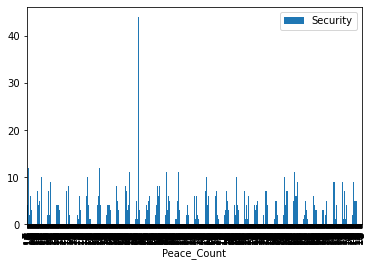

In [67]:
df_onlysp = df_final[['Security', 'Peace_Count']]
df_onlysp.plot(x="Peace_Count", y="Security", kind="bar")

**ML PAPER JADS STARTS HERE!!!**


In [105]:
#df_military = df_military.replace("...", np.nan, inplace=True)
# replace string value with NaN
df_military.replace('...', np.nan, inplace=True)


In [92]:
df_military.head()

,Country,year,spending
0,Algeria,1988,42.082045
1,Libya,1988,NaN
2,Morocco,1988,38.37304
3,Tunisia,1988,29.558419
4,Angola,1988,132.759575


In [93]:
# Checking missing values
missing_values = df_military.isna().sum()
print(missing_values)

Country       0
year          0
spending    800
dtype: int64


In [50]:
#numerical features

num_cols =[ ]

SyntaxError: invalid syntax (1422733151.py, line 1)

In [5]:
# numerical features
num_cols = ['CustomerID', 'Churn','Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress', 'Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount' ]

In [6]:
df_numerical = df[num_cols]

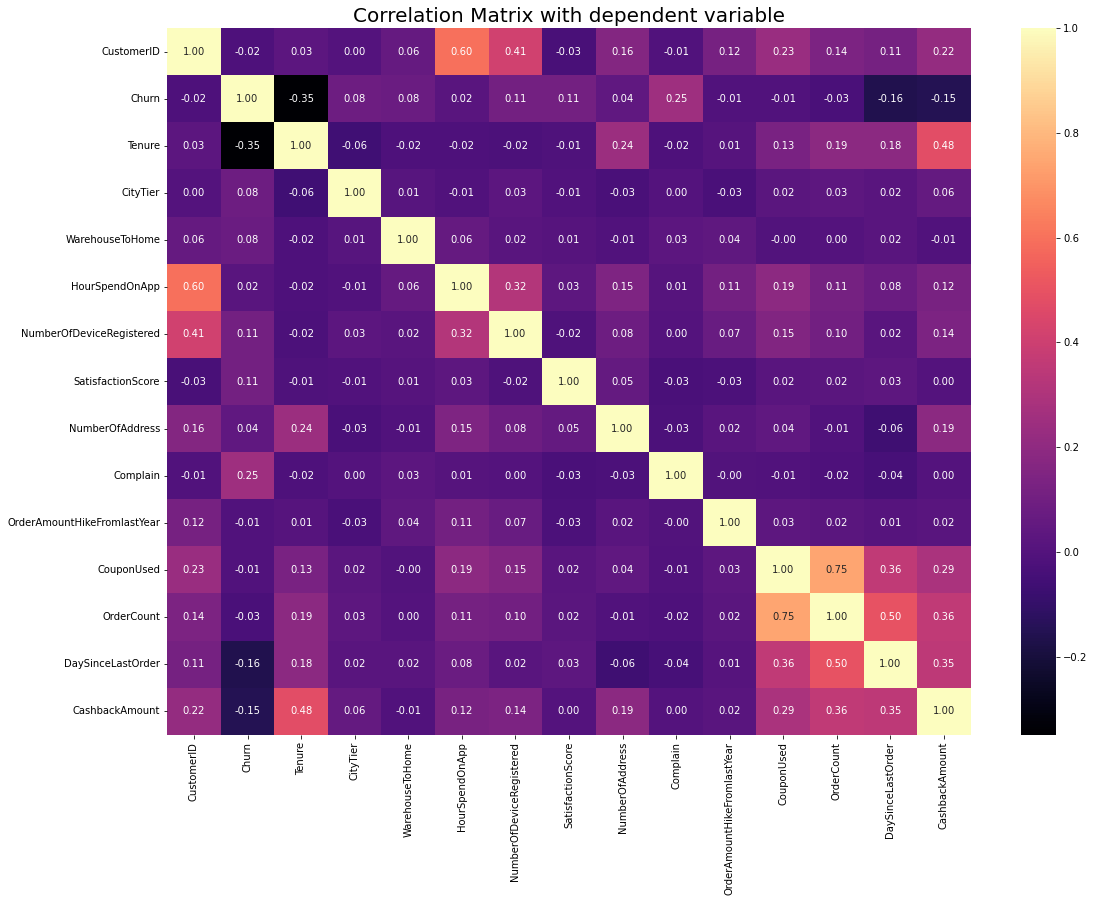

In [7]:
# Correlation Matrix with dependent variable
import seaborn as sns

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix with dependent variable", fontsize=20)
plt.show()

In [8]:
# Multivariate analysis

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target)[numerical_col].mean(), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df_numerical, "Churn", col)

Churn
0    52829.455575
1    52746.575949
Name: CustomerID, dtype: float64


Churn
0    0.0
1    1.0
Name: Churn, dtype: float64


Churn
0    11.502334
1     3.379469
Name: Tenure, dtype: float64


Churn
0    1.619821
1    1.827004
Name: CityTier, dtype: float64


Churn
0    15.353931
1    17.134259
Name: WarehouseToHome, dtype: float64


Churn
0    2.925530
1    2.961798
Name: HourSpendOnApp, dtype: float64


Churn
0    3.639257
1    3.934599
Name: NumberOfDeviceRegistered, dtype: float64


Churn
0    3.001282
1    3.390295
Name: SatisfactionScore, dtype: float64


Churn
0    4.162965
1    4.466245
Name: NumberOfAddress, dtype: float64


Churn
0    0.234088
1    0.535865
Name: Complain, dtype: float64


Churn
0    15.724893
1    15.627409
Name: OrderAmountHikeFromlastYear, dtype: float64


Churn
0    1.758232
1    1.717021
Name: CouponUsed, dtype: float64


Churn
0    3.046601
1    2.823656
Name: OrderCount, dtype: float64


Churn
0    4.807406
1    3.236018
Name: DaySinceLastOrder, d

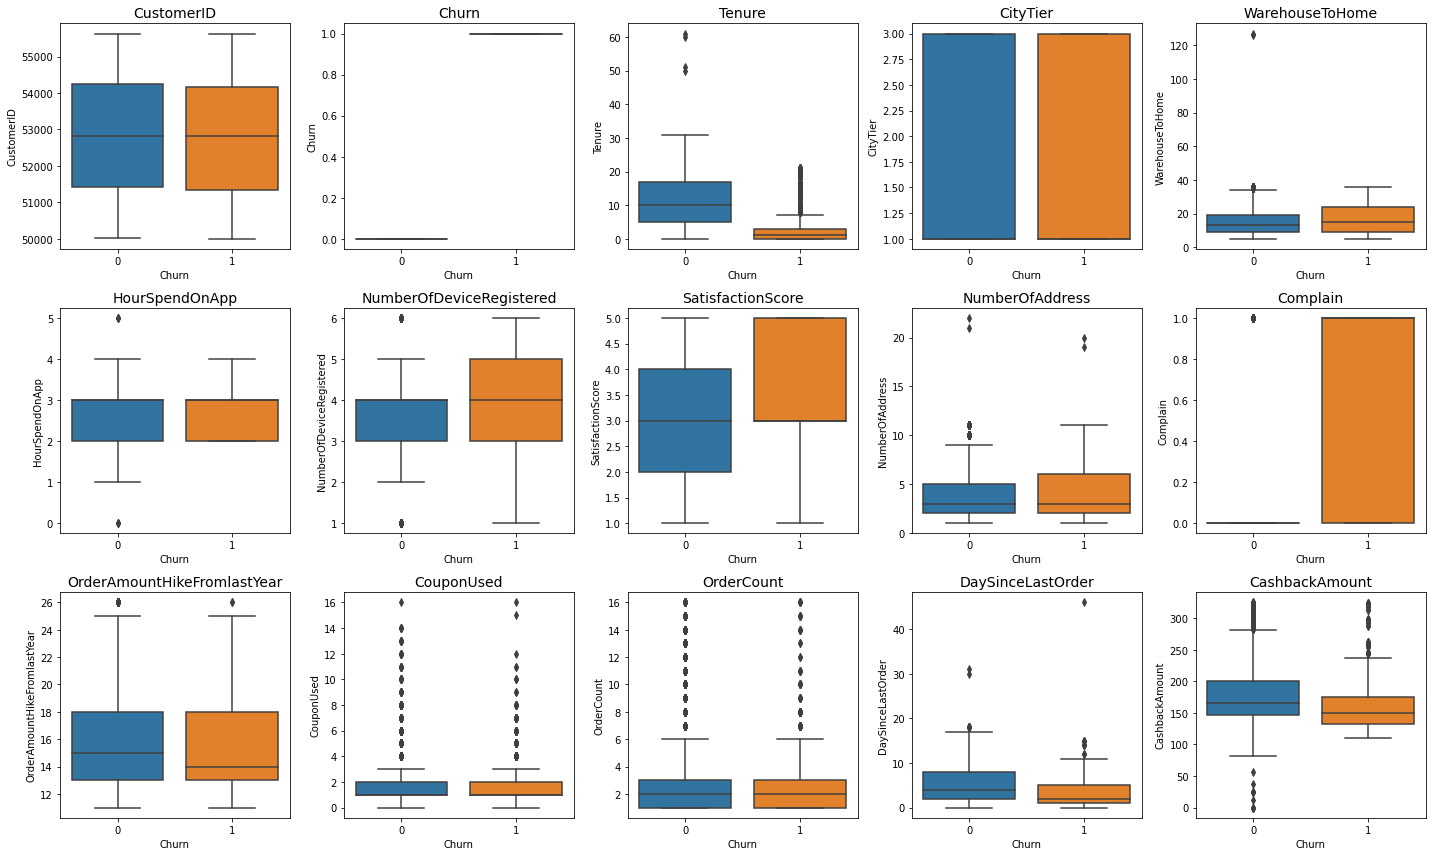

In [9]:
# analysis of numerical variables by target variable
def target_summary_with_num(dataframe, target, num_cols):
    fig, axs = plt.subplots(nrows=3, ncols=len(num_cols)//3, figsize=(20, 12))
    for i, col in enumerate(num_cols):
        sns.boxplot(x=target, y=col, data=dataframe, ax=axs[i//5, i%5])
        axs[i//5, i%5].set_title(col, fontsize=14)
    plt.tight_layout()
    plt.show()

target_summary_with_num(df, "Churn", num_cols)



In [10]:
# correlation with dependent variable
corr_matrix = df_numerical.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn                          1.000000
Complain                       0.250188
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
HourSpendOnApp                 0.018675
CouponUsed                    -0.008264
OrderAmountHikeFromlastYear   -0.010058
CustomerID                    -0.019083
OrderCount                    -0.028697
CashbackAmount                -0.154118
DaySinceLastOrder             -0.160757
Tenure                        -0.349408
Name: Churn, dtype: float64

In [11]:
# Checking missing values
missing_values = df.isna().sum()
print(missing_values)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [12]:
# Checking the percentage of  missing values in features
for i in df.columns:
  # Check if there are any missing values in the column
  if (df[i].isnull().sum() > 0):
    # Calculate the percentage of missing values
    misval = (df[i].isnull().sum()) / (len(df[i])) * 100
    # Print the name of the column and the percentage of missing values
    print(f'{i} Perc. Mis Val = {misval:.2f} %')

Tenure Perc. Mis Val = 4.69 %
WarehouseToHome Perc. Mis Val = 4.46 %
HourSpendOnApp Perc. Mis Val = 4.53 %
OrderAmountHikeFromlastYear Perc. Mis Val = 4.71 %
CouponUsed Perc. Mis Val = 4.55 %
OrderCount Perc. Mis Val = 4.58 %
DaySinceLastOrder Perc. Mis Val = 5.45 %


<AxesSubplot:>

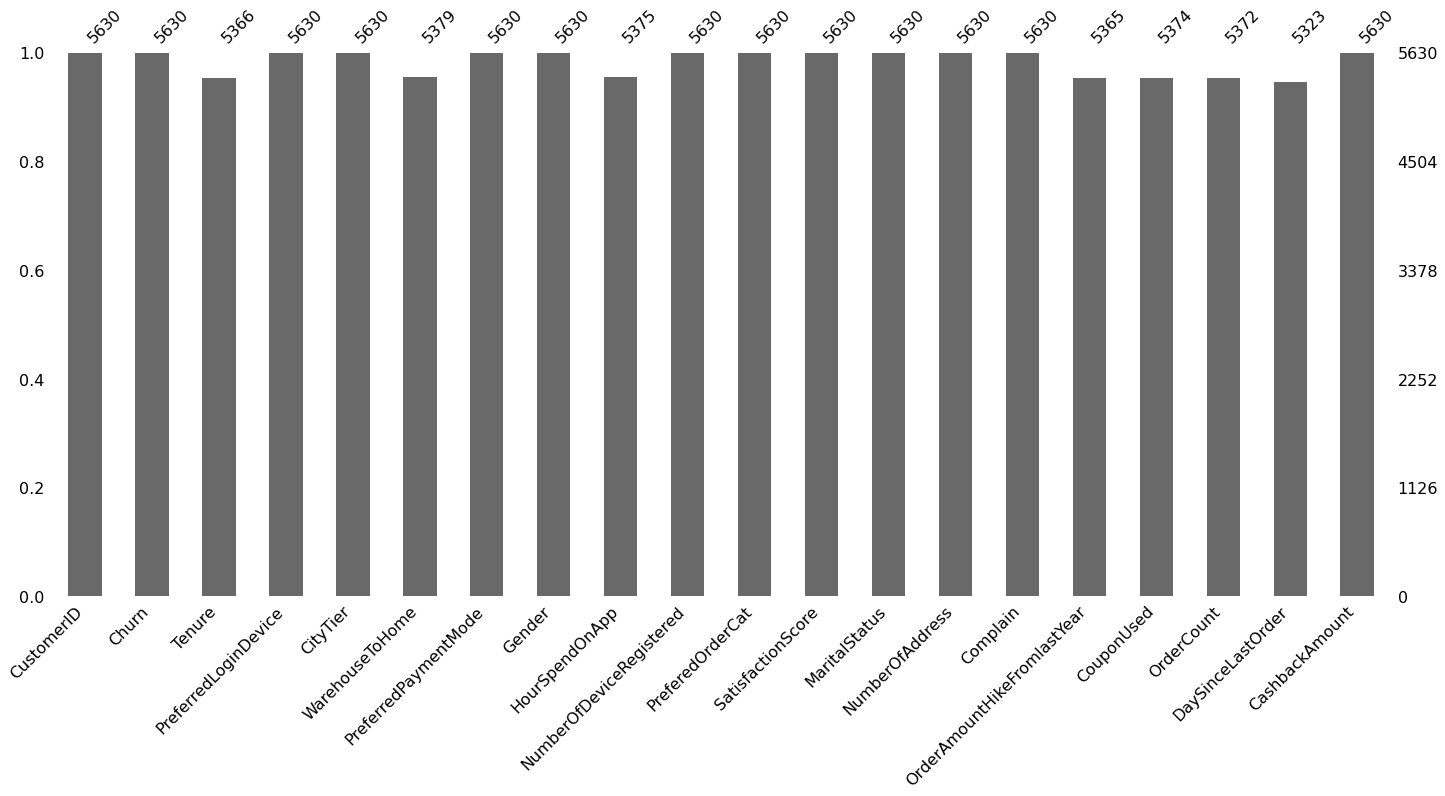

In [13]:
# Gives a bar chart of the missing values
msno.bar(df)

<AxesSubplot:>

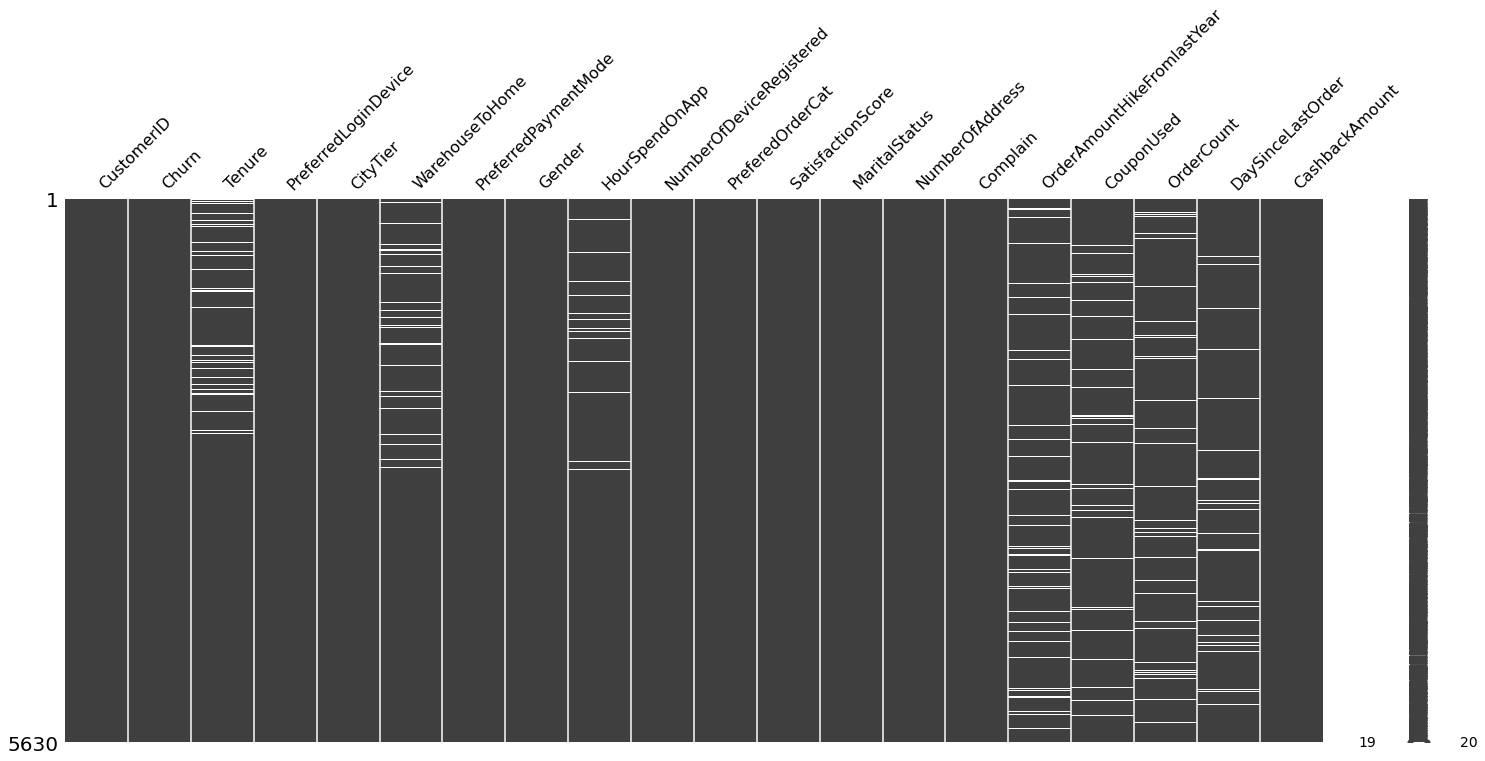

In [14]:
# Gives positional information of the missing values
msno.matrix(df)

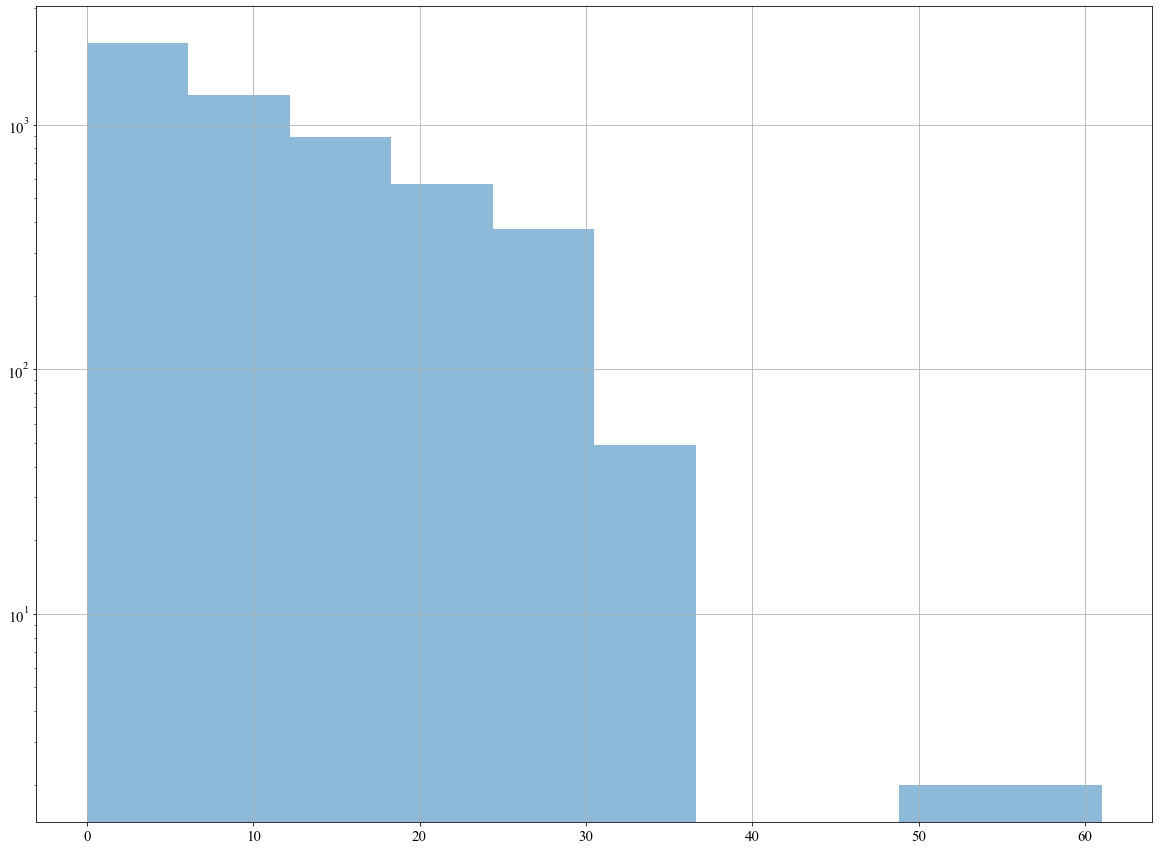

In [15]:
# univariate analysis- 'Tenure'
from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['Tenure'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [16]:
# skewed data - using median to replace the 264 missing values of tenure
df.Tenure.median()

9.0

In [17]:
# skewed data - using median to replace the 264 missing values of tenure
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())



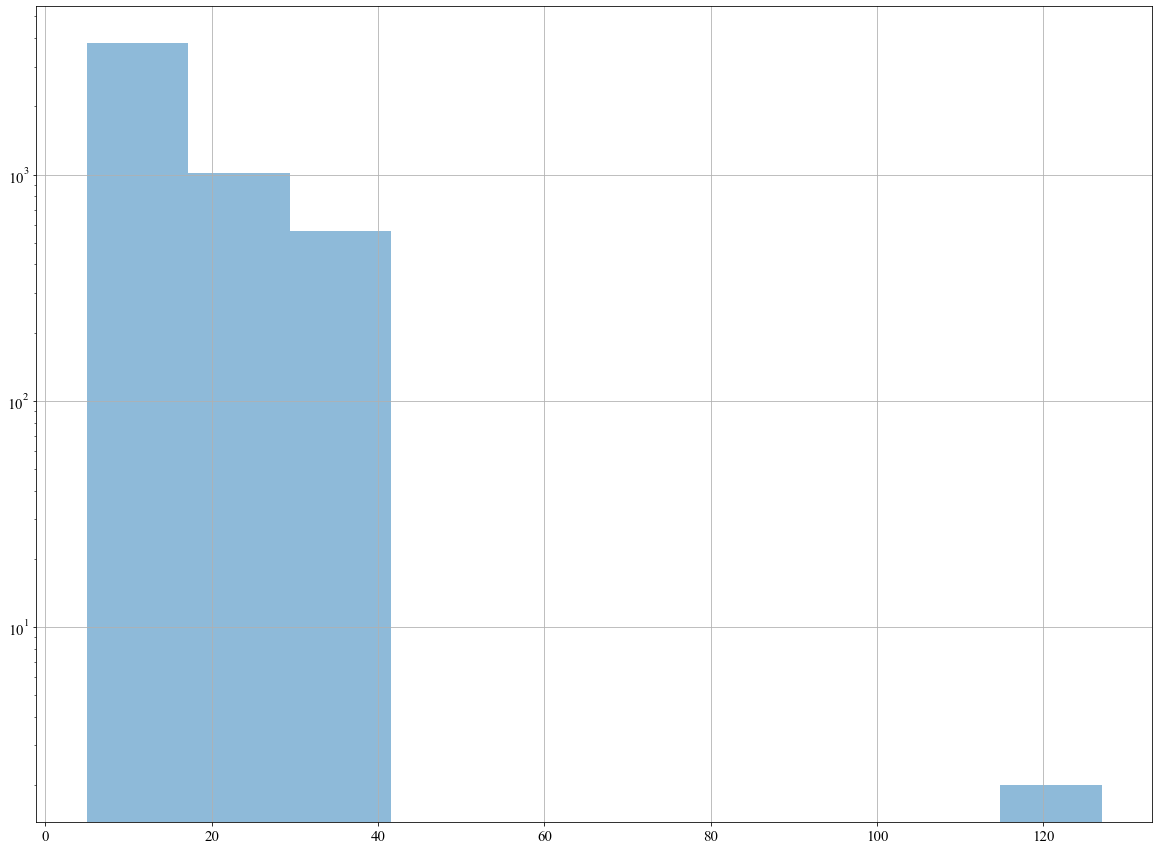

In [18]:
# univariate analysis: skewed data - warehouse to home

from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['WarehouseToHome'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [19]:
# using median to replace the missing values of WarehouseToHome
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mode()[0])



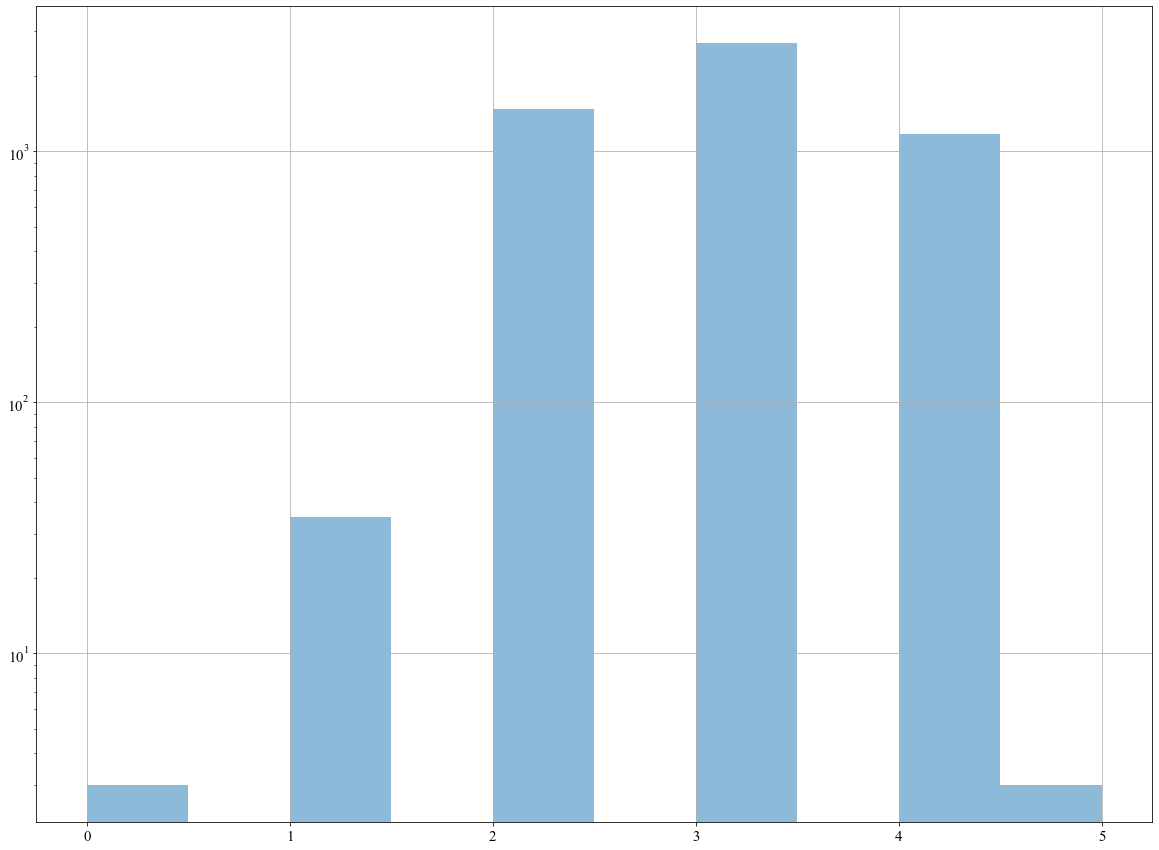

In [20]:
# Univariate analysis HourSpendOnApp 
from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['HourSpendOnApp'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [21]:
# using median to replace the missing values 
# HourSpendOnApp: similar mean and mode and median 
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0])



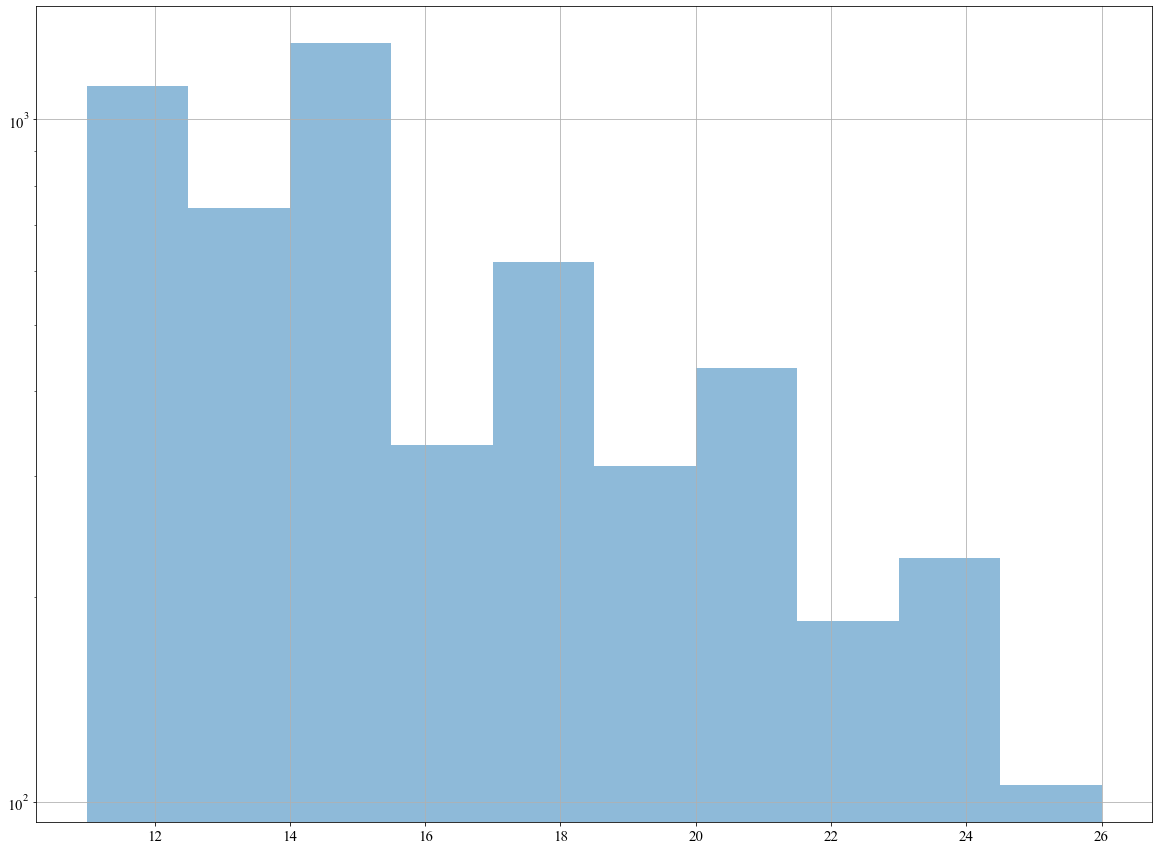

In [22]:
# Univariate Analysis: OrderAmountHikeFromlastYear

from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['OrderAmountHikeFromlastYear'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [23]:
#using mode to replace the missing values 
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mode()[0])

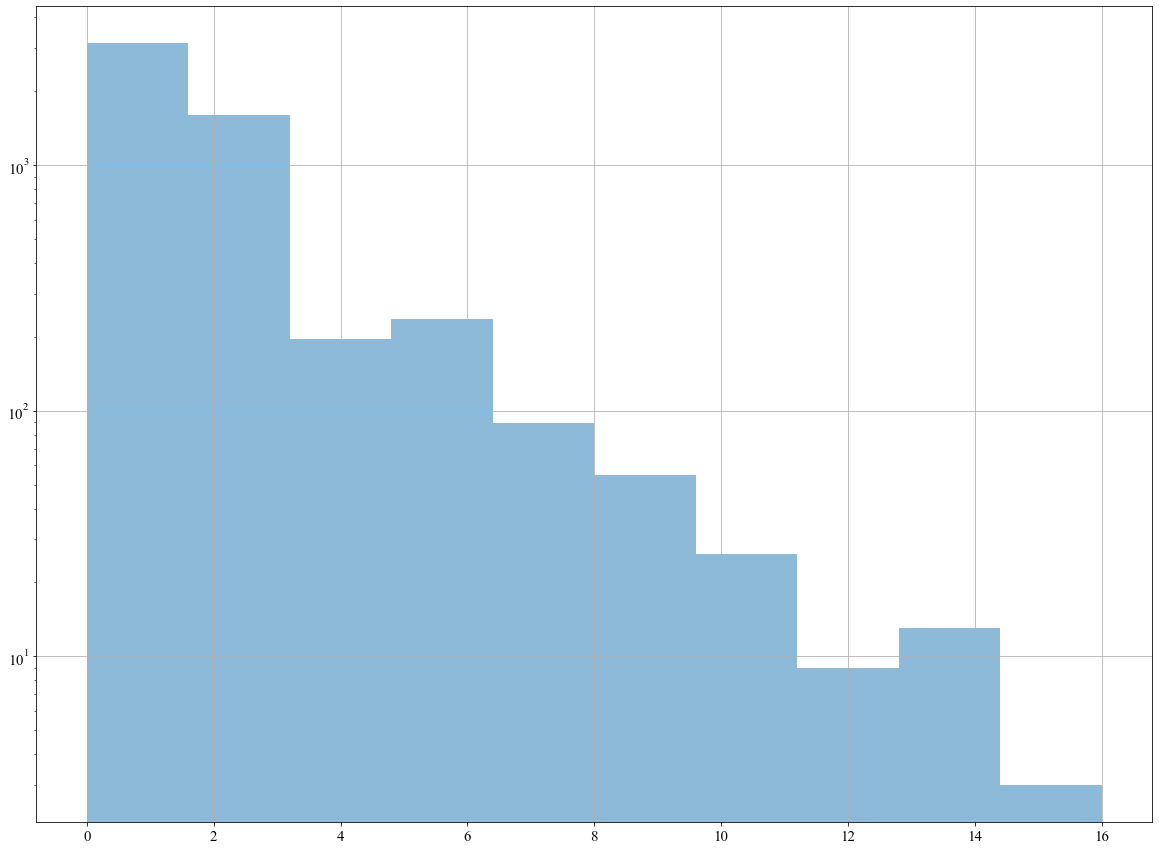

In [24]:
#Univariate Analysis: CouponUsed

from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['CouponUsed'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [25]:
#using mode to replace the missing values (same median and mode)
df['CouponUsed'] = df['CouponUsed'].fillna(df['CouponUsed'].mode()[0])

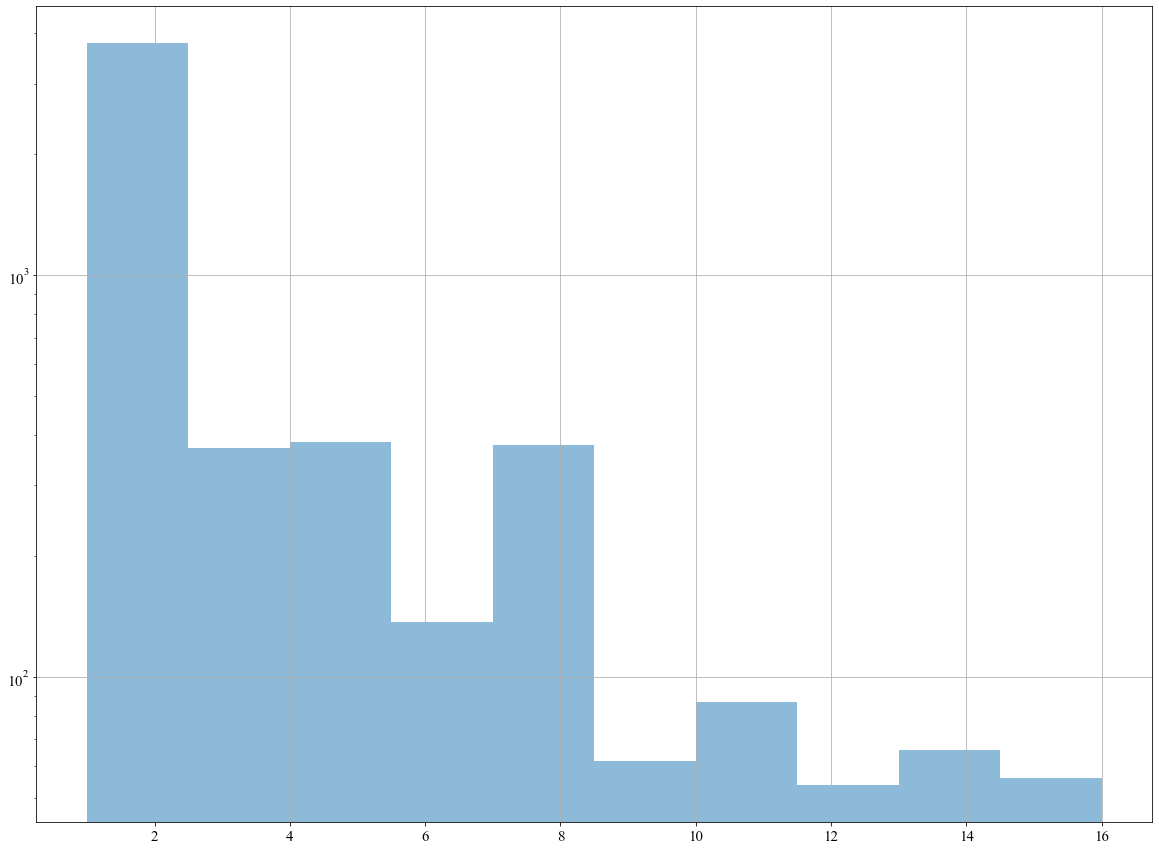

In [26]:
# Univariate analysis: OrderCount

from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['OrderCount'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [27]:
#using mode to replace the missing values (same median and mode)
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].mode()[0])

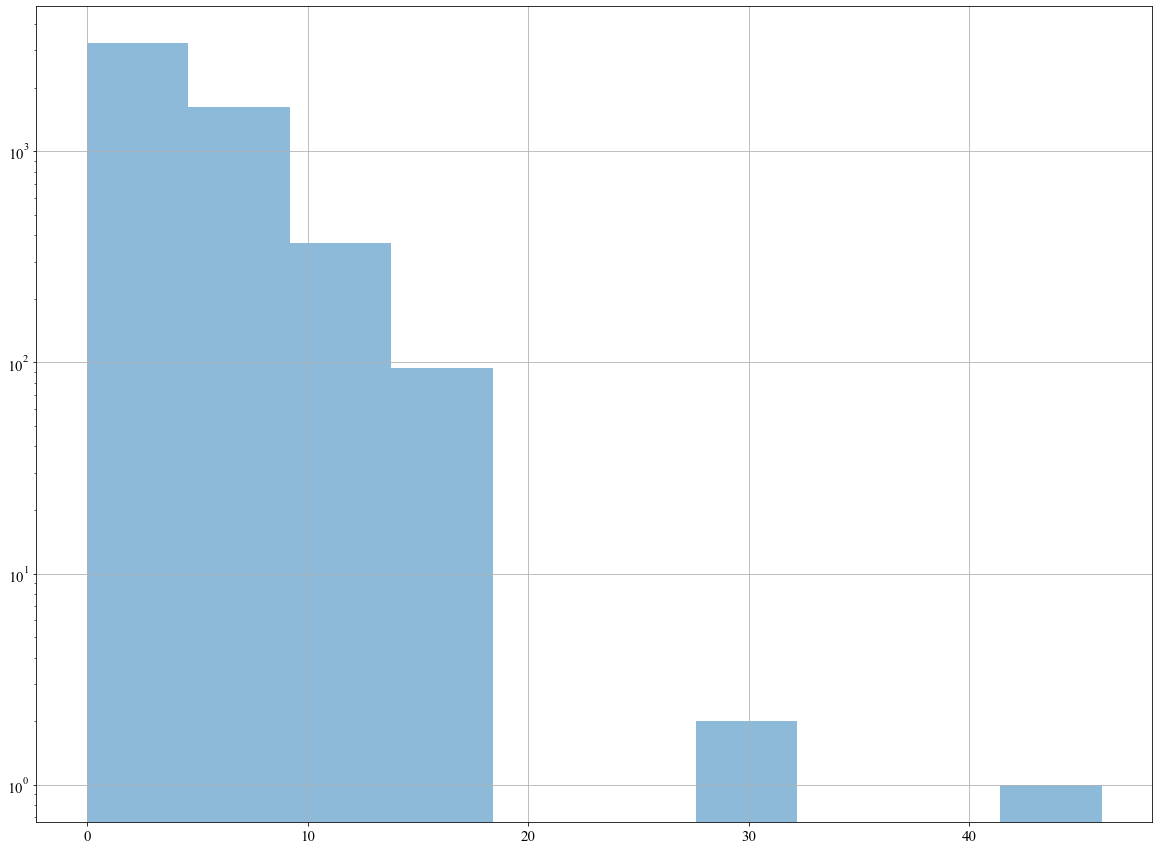

In [28]:
# DaySinceLastOrder

from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df['DaySinceLastOrder'].hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()

In [29]:
#using mode to replace the missing values (same median and mode)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].mode()[0])

In [30]:
# no missing values now

missing_values = df.isna().sum()
print(missing_values)

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


<AxesSubplot:>

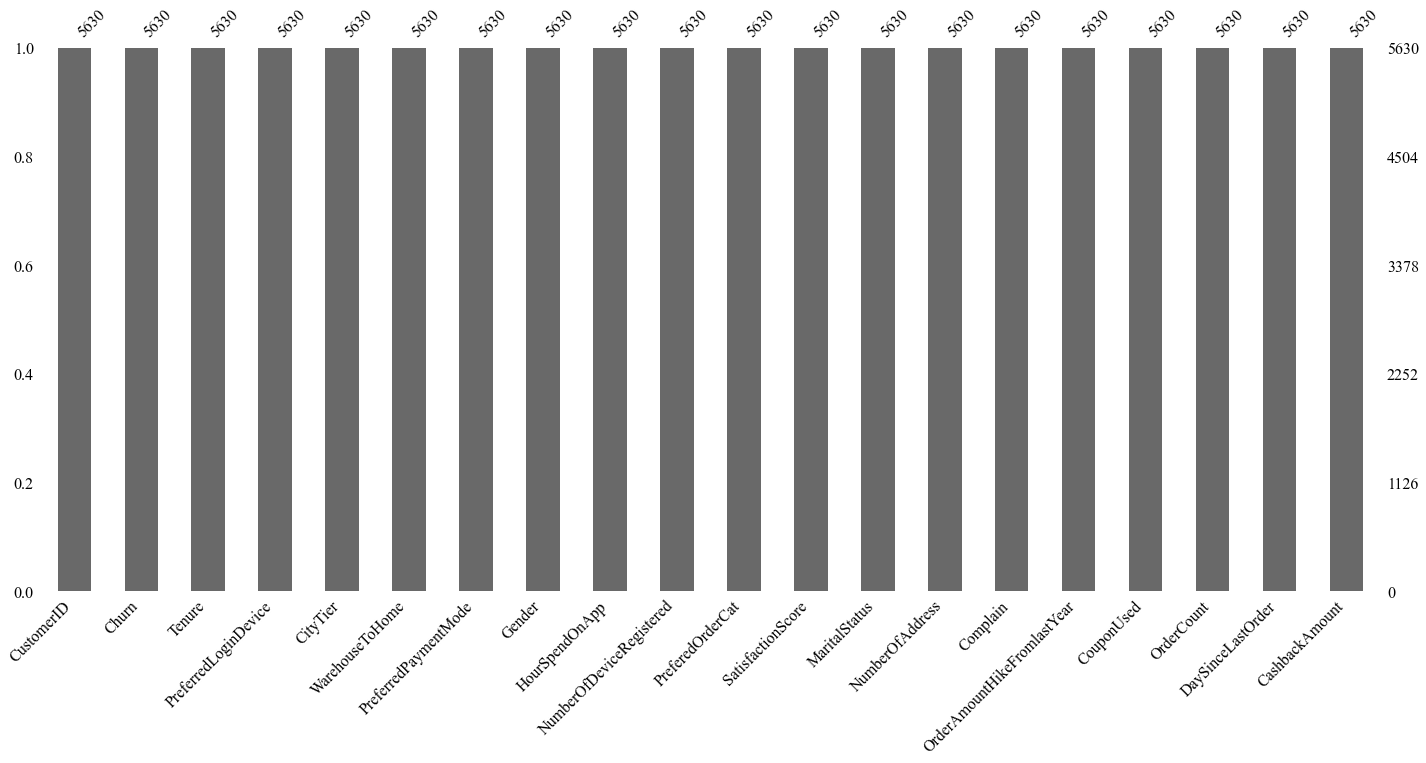

In [31]:
msno.bar(df)

In [32]:
# drop 'CustomerID'
df_clean = df.drop(['CustomerID'], axis=1)

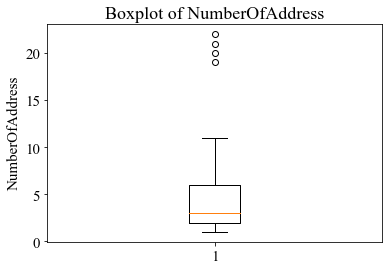

In [33]:
# checking and removing outliers


# Create a boxplot of a single variable
plt.boxplot(df_clean['NumberOfAddress'])
plt.ylabel('NumberOfAddress')
plt.title('Boxplot of NumberOfAddress')
plt.show()



In [34]:
# the numbers of outliers

NumberOfAddress_index = df_clean['NumberOfAddress'] > 13
print(len(df_clean['NumberOfAddress'][NumberOfAddress_index]))

4


In [35]:


tenure_array_no_outliers = df_clean['NumberOfAddress'].values
q1 = np.percentile(df_clean['NumberOfAddress'], 25)
q3 = np.percentile(df_clean['NumberOfAddress'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_clean = df_clean[(tenure_array_no_outliers >= lower_bound) & (tenure_array_no_outliers <= upper_bound)]

print(df_clean)

      Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     9.0                Phone         1              8.0   
2         1     9.0                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                   

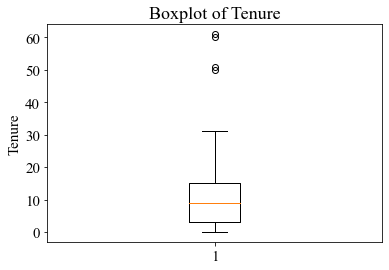

In [36]:


# Create a boxplot of a single variable
plt.boxplot(df_clean['Tenure'])
plt.ylabel('Tenure')
plt.title('Boxplot of Tenure')
plt.show()



In [37]:
# the numbers of outliers

Tenure_index = df_clean['Tenure'] > 35
print(len(df_clean['Tenure'][Tenure_index]))

4


In [38]:


tenure_array_no_outliers = df_clean['Tenure'].values
q1 = np.percentile(df_clean['Tenure'], 25)
q3 = np.percentile(df_clean['Tenure'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_clean = df_clean[(tenure_array_no_outliers >= lower_bound) & (tenure_array_no_outliers <= upper_bound)]

print(len(df_clean.index), len(df_clean.columns))

5622 19


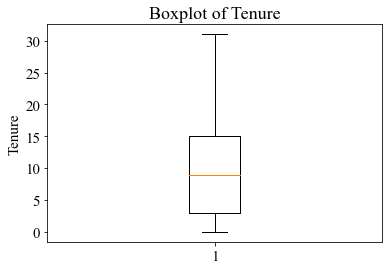

In [39]:


# Create a boxplot of a single variable
plt.boxplot(df_clean['Tenure'])
plt.ylabel('Tenure')
plt.title('Boxplot of Tenure')
plt.show()



 WarehouseToHome

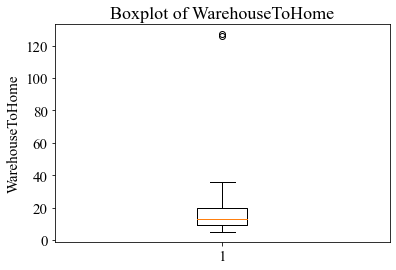

In [40]:
# Create a boxplot of a single variable
plt.boxplot(df_clean['WarehouseToHome'])
plt.ylabel('WarehouseToHome')
plt.title('Boxplot of WarehouseToHome')
plt.show()

In [41]:
# the numbers of outliers

WarehouseToHome_index = df_clean['WarehouseToHome'] > 40
print(len(df_clean['WarehouseToHome'][WarehouseToHome_index]))

2


In [42]:


WarehouseToHome_array_no_outliers = df_clean['WarehouseToHome'].values
q1 = np.percentile(df_clean['WarehouseToHome'], 25)
q3 = np.percentile(df_clean['WarehouseToHome'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_clean = df_clean[(WarehouseToHome_array_no_outliers >= lower_bound) & (WarehouseToHome_array_no_outliers <= upper_bound)]

print(len(df_clean.index), len(df_clean.columns))

5620 19


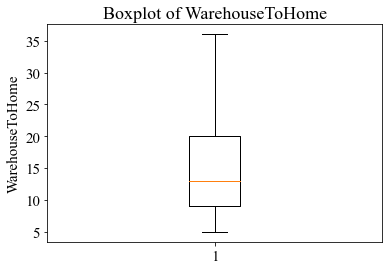

In [43]:
# Create a boxplot of a single variable
plt.boxplot(df_clean['WarehouseToHome'])
plt.ylabel('WarehouseToHome')
plt.title('Boxplot of WarehouseToHome')
plt.show()

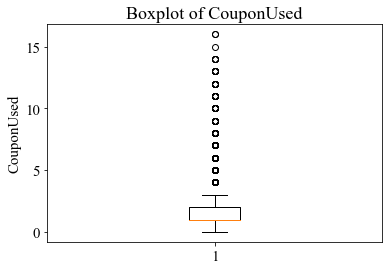

In [44]:
# CouponUsed
plt.boxplot(df_clean['CouponUsed'])
plt.ylabel('CouponUsed')
plt.title('Boxplot of CouponUsed')
plt.show()

In [45]:
# the numbers of outliers

CouponUsed_index = df_clean['CouponUsed'] > 3
print(len(df_clean['CouponUsed'][CouponUsed_index]))

629


#HourSpendOnApp

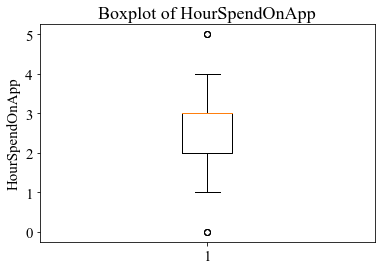

In [46]:
plt.boxplot(df_clean['HourSpendOnApp'])
plt.ylabel('HourSpendOnApp')
plt.title('Boxplot of HourSpendOnApp')
plt.show()

In [47]:
# the numbers of outliers

HourSpendOnApp_index = df_clean['HourSpendOnApp'] > 4
print(len(df_clean['HourSpendOnApp'][HourSpendOnApp_index]))

3


In [48]:


HourSpendOnApp_array_no_outliers = df_clean['HourSpendOnApp'].values
q1 = np.percentile(df_clean['HourSpendOnApp'], 25)
q3 = np.percentile(df_clean['HourSpendOnApp'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_clean = df_clean[(HourSpendOnApp_array_no_outliers >= lower_bound) & (HourSpendOnApp_array_no_outliers <= upper_bound)]

print(df_clean)

      Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     9.0                Phone         1              8.0   
2         1     9.0                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                   

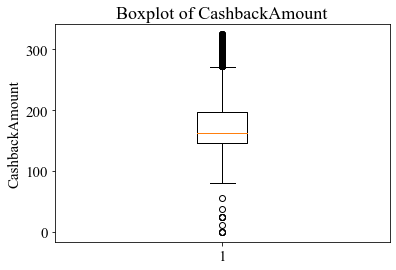

In [49]:
#CashbackAmount

plt.boxplot(df_clean['CashbackAmount'])
plt.ylabel('CashbackAmount')
plt.title('Boxplot of CashbackAmount')
plt.show()

In [50]:
CashbackAmount_index = df_clean['CashbackAmount'] > 200
print(len(df_clean['CashbackAmount'][CashbackAmount_index]))

1318


In [51]:
# DaySinceLastOrder

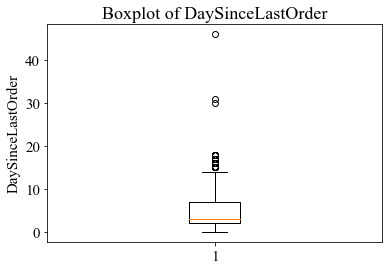

In [52]:
plt.boxplot(df_clean['DaySinceLastOrder'])
plt.ylabel('DaySinceLastOrder')
plt.title('Boxplot of DaySinceLastOrder')
plt.show()

In [53]:
DaySinceLastOrder_index = df_clean['DaySinceLastOrder'] > 15
print(len(df_clean['DaySinceLastOrder'][DaySinceLastOrder_index]))

43


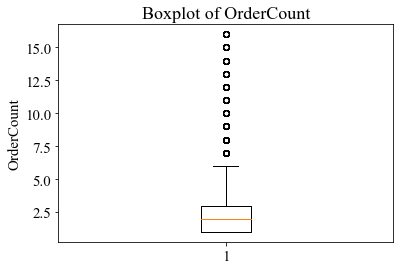

In [54]:

#OrderCount
plt.boxplot(df_clean['OrderCount'])
plt.ylabel('OrderCount')
plt.title('Boxplot of OrderCount')
plt.show()

In [55]:

OrderCount_index = df_clean['OrderCount'] > 6
print(len(df_clean['OrderCount'][OrderCount_index]))

701


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
df_clean.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

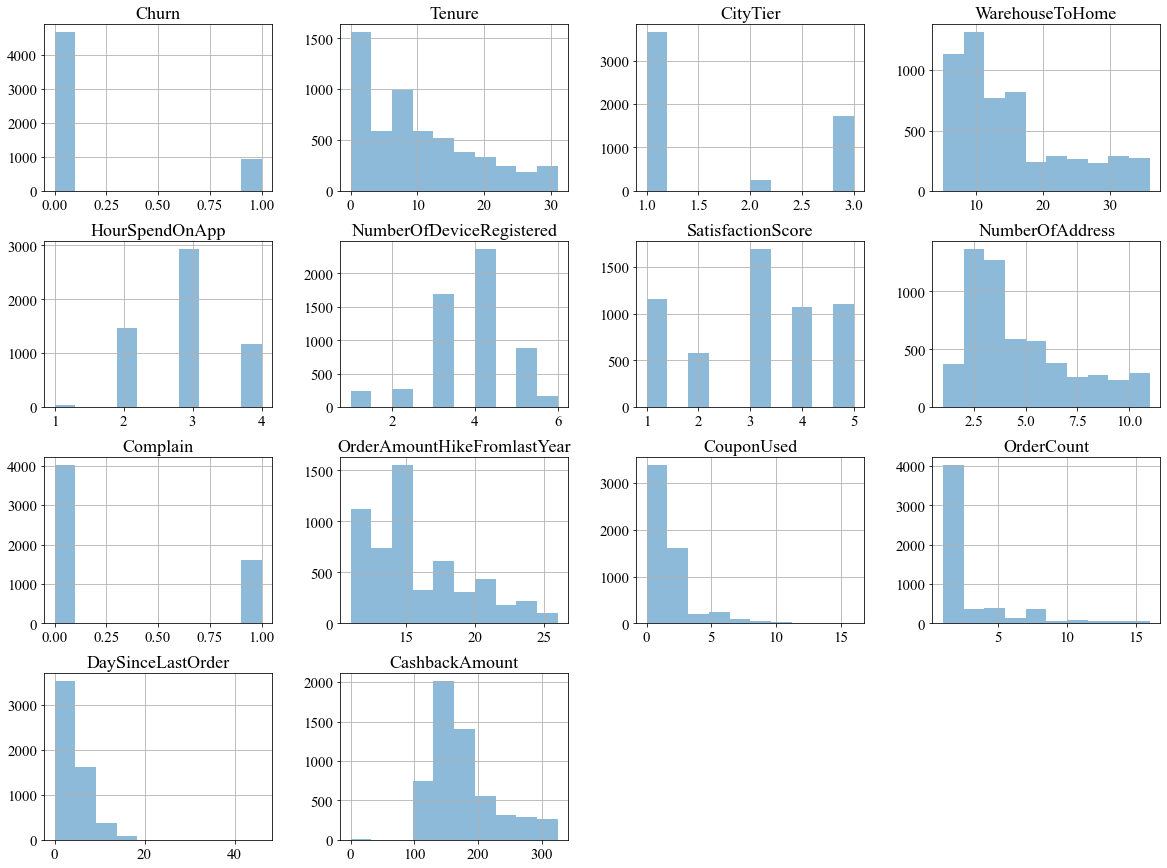

In [58]:
# Plotting the histograms of each numerical variable before scaling
from matplotlib import pyplot
pyplot.rcParams['font.size'] = 15
df_clean.hist(alpha=0.5, figsize=(20, 15))
pyplot.yscale('log')
pyplot.show()


In [59]:
# feature encoding: transfer categorical data in to numerical
print(df_clean['PreferredLoginDevice'].unique())
print(df_clean['PreferredPaymentMode'].unique())
print(df_clean['Gender'].unique())
print(df_clean['PreferedOrderCat'].unique())
print(df_clean['MaritalStatus'].unique())



['Mobile Phone' 'Phone' 'Computer']
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
['Female' 'Male']
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
['Single' 'Divorced' 'Married']


In [60]:
# one-hot encoding
cat_cols = df_clean.select_dtypes(include='object')
cat_cols


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [61]:
# create dummies
encoded = pd.get_dummies(cat_cols,drop_first=True)
df_clean_enc = pd.concat([df_clean.drop(cat_cols.columns, axis=1), encoded], axis=1)

In [62]:
# features after one-hot encoding
print(df_clean_enc)

      Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0         1     4.0         3              6.0             3.0   
1         1     9.0         1              8.0             3.0   
2         1     9.0         1             30.0             2.0   
3         1     0.0         3             15.0             2.0   
4         1     0.0         1             12.0             3.0   
...     ...     ...       ...              ...             ...   
5625      0    10.0         1             30.0             3.0   
5626      0    13.0         1             13.0             3.0   
5627      0     1.0         1             11.0             3.0   
5628      0    23.0         3              9.0             4.0   
5629      0     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                 

In [63]:
# Feature scaling: normalization-- new df:df_normalized
from sklearn.preprocessing import MinMaxScaler

# Select the columns we want to normalize
cols_to_normalize = [ 'Churn', 'Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery','PreferredPaymentMode_Credit Card','PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Male', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile','PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others','MaritalStatus_Married','MaritalStatus_Single']

# Create a new DataFrame with only the selected columns
df_scaled = df_clean_enc[cols_to_normalize]

# Create a new MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data and return a new DataFrame
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=cols_to_normalize)



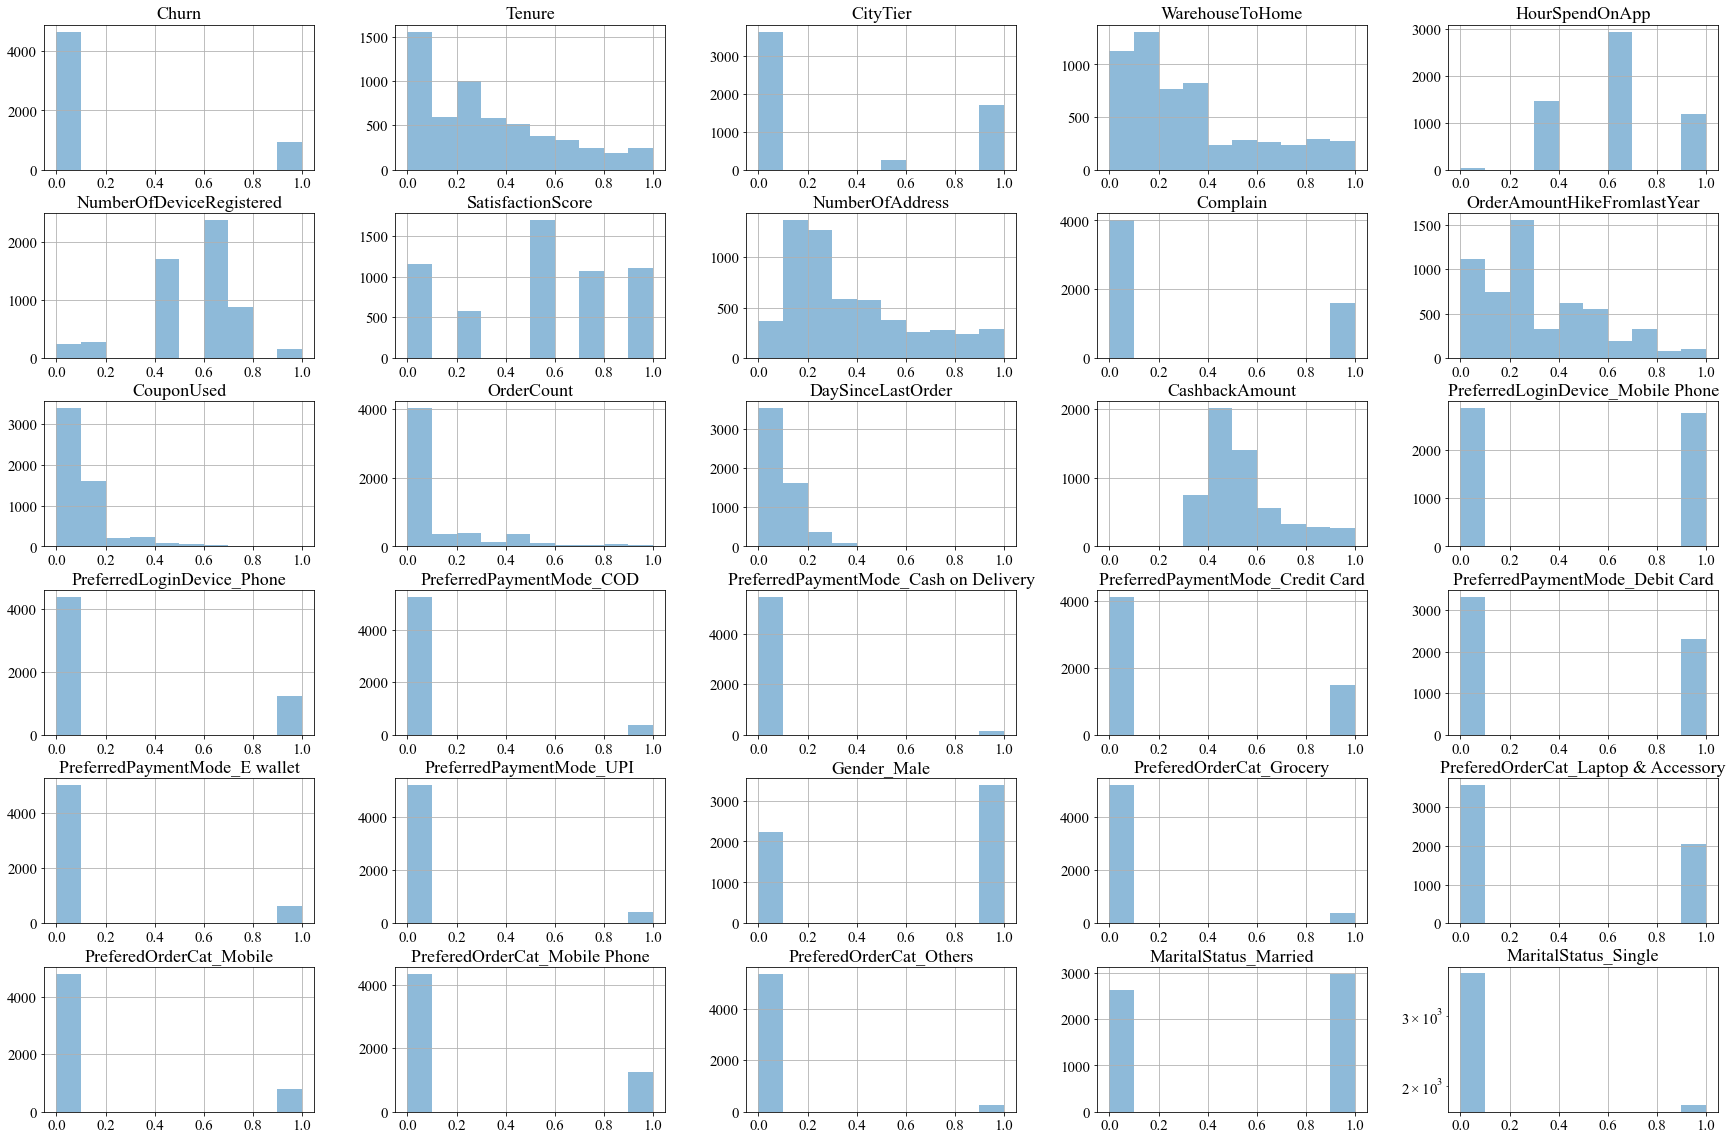

In [64]:
# Plotting the histograms of each numerical variable - finish feature scaling


from matplotlib import pyplot 
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['font.family'] = 'Times New Roman'
df_normalized.hist(alpha=0.5, figsize=(30, 20))
pyplot.yscale('log')
pyplot.show()

In [65]:
df_normalized.to_csv('/Users/wangyidan/Documents/machine learning/df_normalised.csv')